# Tabular Data Exploration
The first step in machine learning is to understand and explore the data. This includes the following general step:
- Loading the data
- Looking at the variables in the dataset (i.e., numerical vs. categorical, which need preprocessing)
- Visualizing the distribution of the variables

For our analysis, we are using a sample of the 1994 US census. Our goal is to determine whether a person earns over $50,000 per year from data like age, employment, education, etc.

## Loading Dataset

In [9]:
import pandas as pd

adult_census = pd.read_csv("adult.csv")
adult_census.head()

,id,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,1,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,2,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,3,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,4,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,5,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


## Exploring Features of the Dataset

In [10]:
target = "class"
adult_census[target].value_counts()

class
<=50K    37155
>50K     11687
Name: count, dtype: int64

Our target is `class`, which falls into two classes: `<=50K` and `>50K`. Therefore, this resulting prediction is a *binary classification problem*.

As can be seen, there is *class imbalance*, as there are over 3x as many `<=50K` than `>50K`.

In [11]:
numerical_features = [
    "age",
    "education-num",
    "capital-gain",
    "capital-loss",
    "hours-per-week",
]

categorical_features = [
    "workclass",
    "education",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "native-country",
]

adult_census = adult_census[numerical_features + categorical_features + [target]]
adult_census.shape

(48842, 14)

From the various features we have, this dataset contains 48,842 records with 13 distinct features.

## Visualizing the Dataset

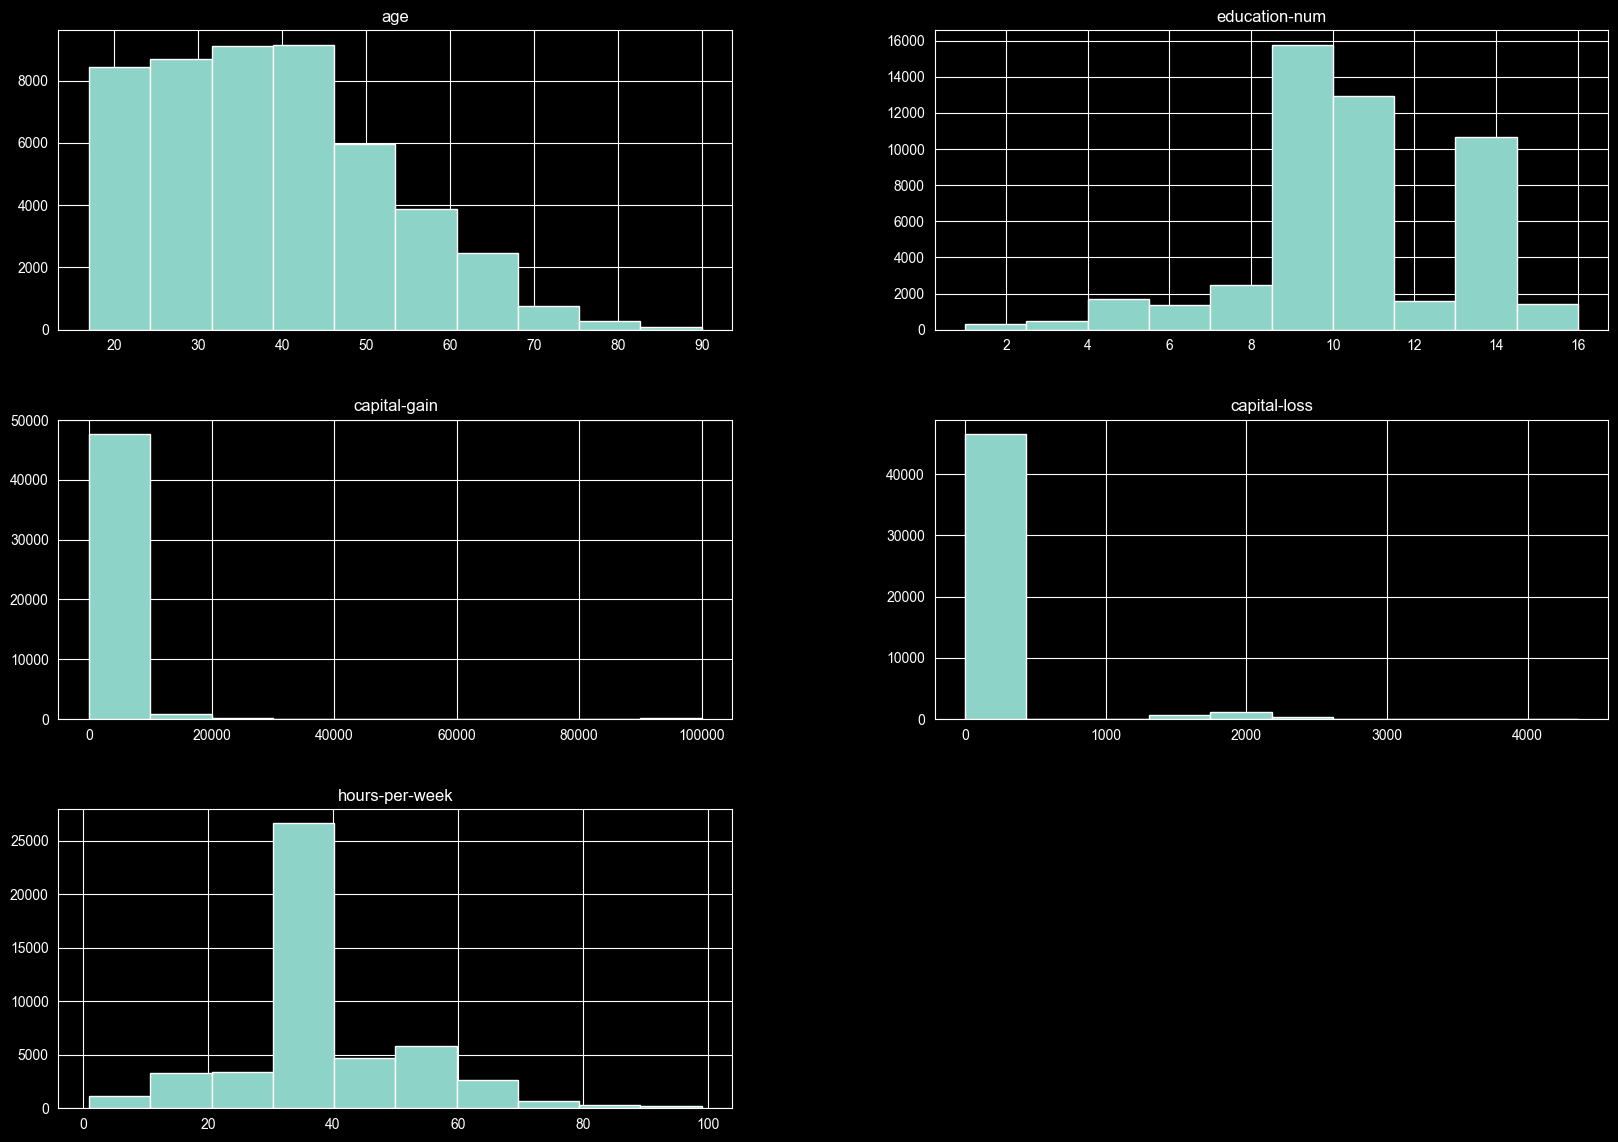

In [12]:
_ = adult_census.hist(figsize = (20, 14))

From a quick visualization of the *numerical features*, we can make some comments about the features, like a right-skewed distribution of ages.

In [13]:
adult_census["sex"].value_counts()

sex
Male      32650
Female    16192
Name: count, dtype: int64

For *categorical features*, we can see a distribution. Here, `sex` is imbalanced heavily towards `Male`.

In [14]:
pd.crosstab(
    index=adult_census["education"], columns=adult_census["education-num"]
)

education-num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
education,,,,,,,,,,,,,,,,
10th,0,0,0,0,0,1389,0,0,0,0,0,0,0,0,0,0
11th,0,0,0,0,0,0,1812,0,0,0,0,0,0,0,0,0
12th,0,0,0,0,0,0,0,657,0,0,0,0,0,0,0,0
1st-4th,0,247,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5th-6th,0,0,509,0,0,0,0,0,0,0,0,0,0,0,0,0
7th-8th,0,0,0,955,0,0,0,0,0,0,0,0,0,0,0,0
9th,0,0,0,0,756,0,0,0,0,0,0,0,0,0,0,0
Assoc-acdm,0,0,0,0,0,0,0,0,0,0,0,1601,0,0,0,0
Assoc-voc,0,0,0,0,0,0,0,0,0,0,2061,0,0,0,0,0


There appear to be two redundant features: `education-num` (the number of years of education) and `education` (grade levels). As can be seen, the number of years has a corresponding value with the level, so in practice, we can likely exclude `education-num` without losing much information.

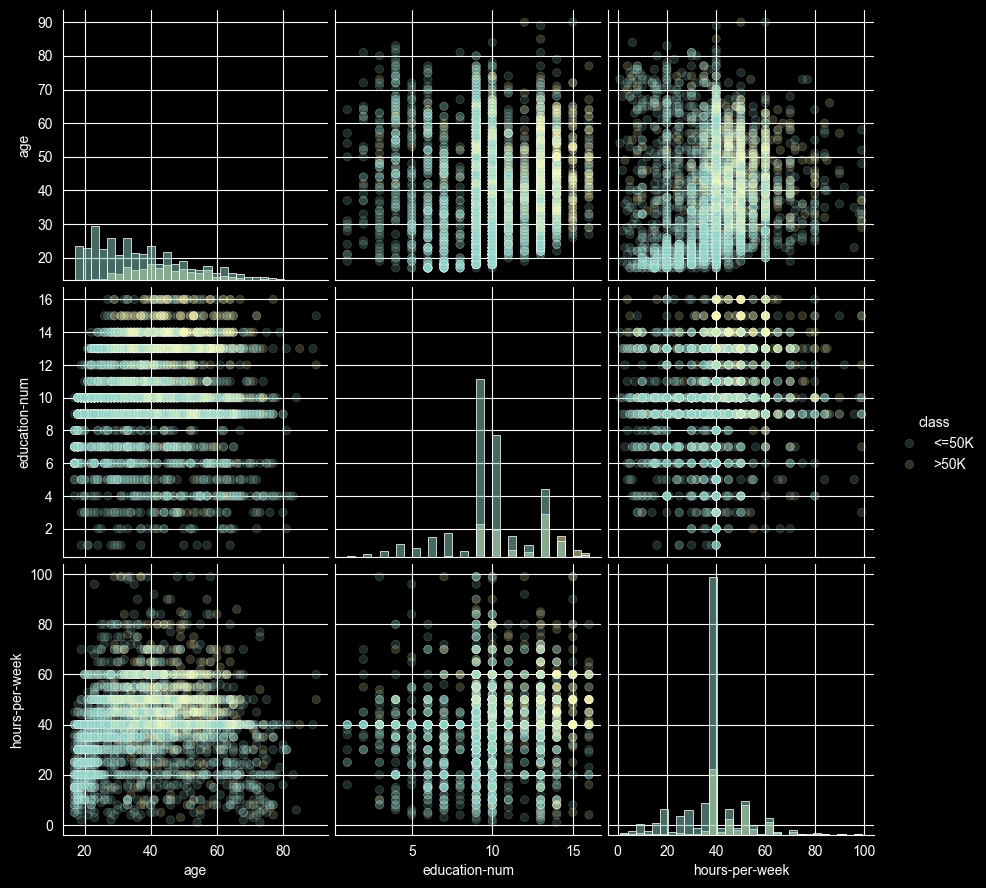

In [18]:
import seaborn as sns

n_samples_to_plot = 5000
columns = ["age", "education-num", "hours-per-week"]
_ = sns.pairplot(
    data=adult_census[:n_samples_to_plot],
    vars=columns,
    hue=target,
    plot_kws={"alpha": 0.2},
    height=3,
    diag_kind="hist",
    diag_kws={"bins": 30},
)

This is another common way to inspect the data: using a `pairplot`. This shows how each feature (here we selected only 3) plot against each other, which the `class` indicated by color.